In [23]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

## Generate Dataset and plot points

Using  the make blob function we can generate a dataset that has a sample size of 300 unique data inputs with 4 general classes in which the data may fall and a standard deviaton of 0.6. We then use the plt,scatter fuction to plot the varying data points on a map.

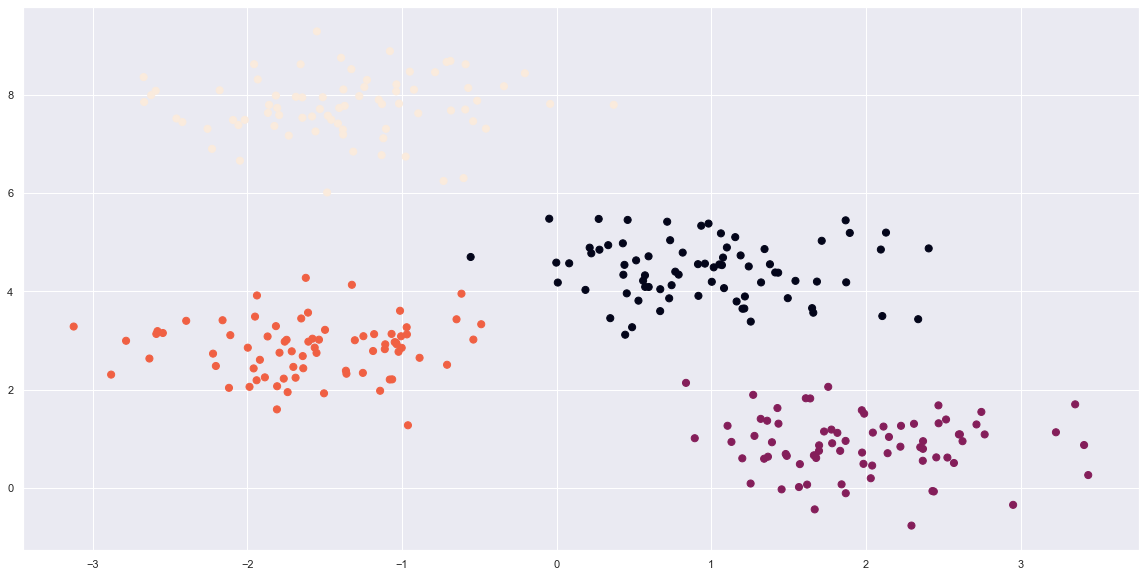

In [22]:
# manually generate dataset
# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
# store the return value to X and y_true
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# plot the dataset using plt.scatter()
plt.figure(figsize = (20,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true)

plt.show()

## Predicting Center points with KMeans

Using the KMeans fucntion provided we can make a predicted guess of the center points for the clusters in the generated data set above by using the follwing parameters:
 - The dataset was divided into 4 main clusters and as such we will set the n_clusters value to 4 so that we can get the predicted 4 center points for each of those cluster. 
 - The init value will be set to random, which is the standard setting for KMeans implementation. 
 - The n_init value dictates the number of initializations to perform and the max_iter the number of iterations for those initializations. The initalization step assigns each data point to its nearest centroid. Then, the iterations computes the mean of all the points for each cluster and sets the new centroid. This continues until the centroid converges to a point that will not change as it is the lowest mean value for all data points collectively. 

We then fit the object to the data in X. This will perform ten runs of the k-means algorithm on the dataset with a maximum of 300 iterations per run. The predicted values of X can be determined by using the fucntion k_obj.predict

In [3]:
# use sklearn api to visualize the clustering result.

# first create the Kmeans obejct
k_obj = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=0)

# then fit the data
k_obj.fit(X)

# finally, make prediction
print(k_obj.predict(X))

[2 0 1 0 2 2 3 1 0 0 3 0 1 0 2 1 1 2 3 3 2 2 1 3 3 1 2 1 3 1 0 0 1 0 0 0 0
 0 3 2 1 3 1 1 3 3 0 3 0 2 3 2 0 2 2 3 0 3 0 2 0 1 0 3 3 3 0 2 0 3 1 3 0 3
 3 0 3 1 2 0 2 1 2 2 0 1 2 1 0 0 1 2 0 3 3 1 2 2 1 3 0 2 0 2 1 2 2 1 0 1 3
 3 2 0 2 1 0 2 2 1 3 2 3 2 2 2 2 3 2 3 0 3 3 2 0 3 3 0 1 0 0 3 1 3 1 3 0 1
 0 0 0 1 0 1 2 3 0 3 2 1 0 1 1 2 1 3 3 1 2 1 1 0 2 1 3 0 2 2 1 3 2 1 3 3 1
 1 1 1 2 0 1 3 1 1 3 3 3 1 3 0 1 3 2 3 1 0 3 0 1 0 1 3 1 1 0 3 3 2 2 1 0 2
 2 3 2 3 1 0 0 1 1 0 1 2 3 1 2 3 0 3 2 1 2 0 0 0 0 3 3 0 1 3 2 1 3 3 3 2 2
 0 1 1 3 2 0 3 1 0 1 2 2 3 3 1 2 2 2 1 0 0 2 2 1 2 2 2 0 3 0 1 2 2 0 0 0 2
 2 1 0 3]


## Plotting Predicted Center Points

We can plot the points of the KMeans predicted values and center points on a map. Similar to what was done above, we use plt.scatter to plot the points of the dataset and by adding the centers acquired from the KMeans fucnton we, then plot those on the same graph. This will give us a visual representaton of how the KMeans fucntion will get to the center of each cluster.

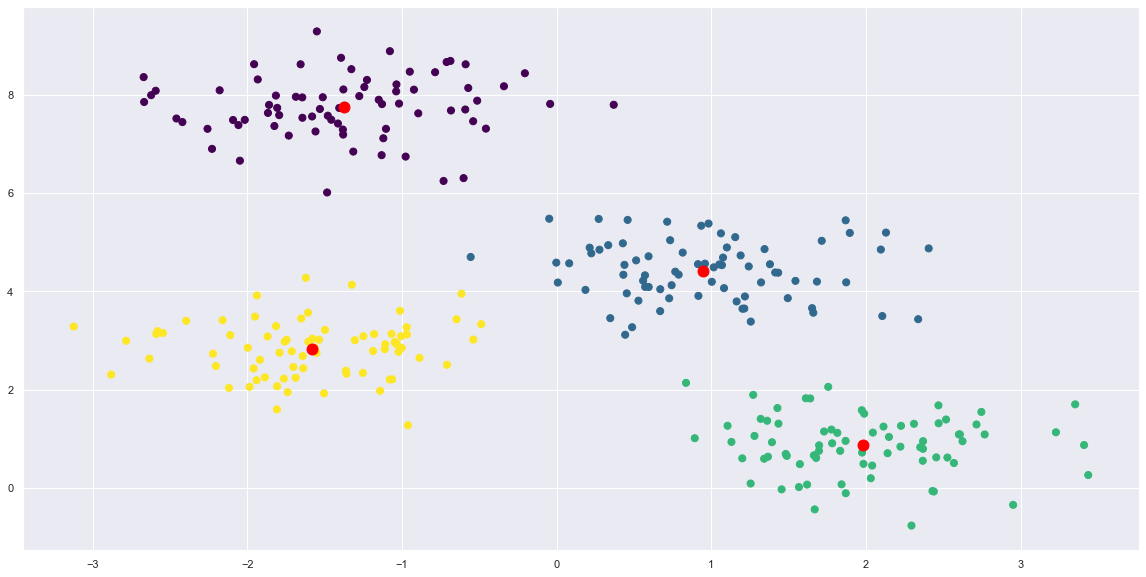

In [4]:
# visualize the clustering result
plt.figure(figsize = (20,10))

# using the plt.scatter() with x=input data, y=data label, s=50 and set colormap to viridis
plt.scatter(X[:, 0], X[:, 1], c=k_obj.predict(X), s=50, cmap='viridis')

# sort the centers to a variable using kmeans.cluster_centers_
centrePoints=[] 
centrePoints= k_obj.cluster_centers_

# plot the center points using the plt.scatter() 
plt.scatter(centrePoints[:, 0], centrePoints[:, 1],s=120,c='red', marker="o")

plt.show()

## Defining KMeans Function

We can define our own KMeans function by using the knowledge acquired from the one presented above. Using the numpy library, we are able to use a variety of its functions to help solve this problem. We can then use the randon state function to sumplement for the random state parameter in the KMeans function. We then use this to create the inital centre points and get the first k of those and assign them to a list. Until the list converges to a point where the centres don't change value, we will find the closest centers to certain points and label those distances. We then find the means of all the distances of points that share the same labels and make that the new centres. 

(4, 2)


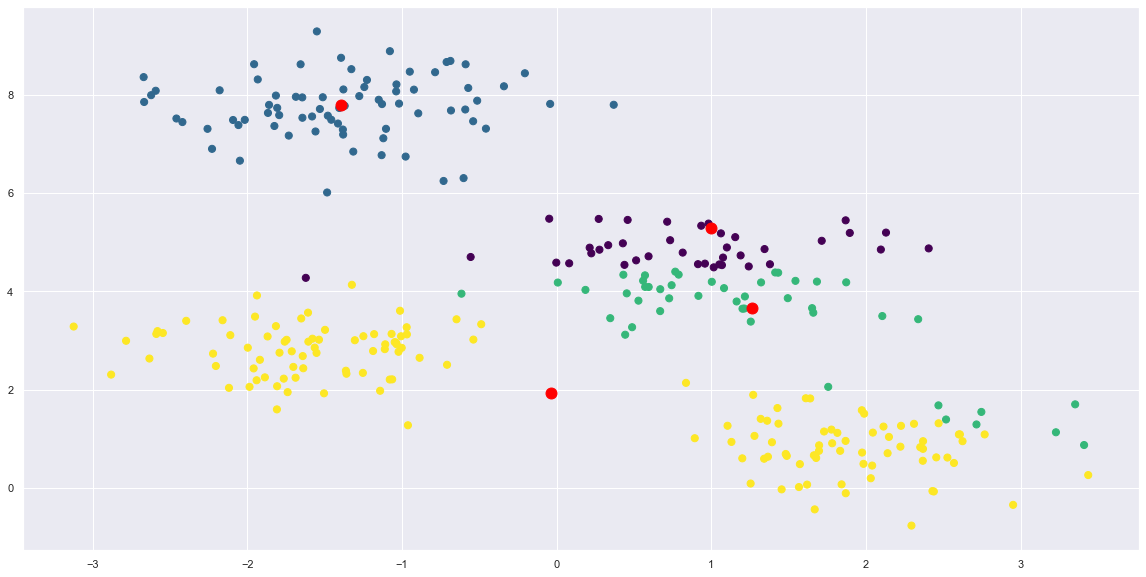

In [68]:
# def find_clusters(X, n_clusters, rseed=2):
def find_clusters(X, n_clusters, rseed, centrePoints = [] ): #list included to accomodate for KMeans++ implemetation
    
    if len(centrePoints) == 0: #check if we are doing a normal KMeans or KMeans++ fucntion, for KMeans++ we get an initial centre list
    # 1. Randomly choose clusters
#     using np.random.RandomState first to set the seed and store it to a variable r
        r = np.random.RandomState(rseed)
    
#     using r.permutation(data shape) to choose first k data point index as initial center.
#     store the center to a list.
        centrePoints = r.permutation(X)[:n_clusters]#takes the fisrt k centre points and make them the intial plot points
    
#     repeat until convergence:
    while True: #acts as do ...until loop
        
#         Assign labels based on closest center using pairwise_distances_argmin()
        labels = pairwise_distances_argmin(X, centrePoints)
    
#         Find new centers from means of points:         
#         Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
        newCentres = []
        for i in range(n_clusters):
            x_labels = X[labels==i]
            newCentres.append(x_labels.mean(0))
        centrePoints = newCentres
        
#         check for convergence:
        if np.all(centrePoints != newCentres):
                                   
#             convergence if old center is new center
             centrePoints = newCentres
        else:
            labels = pairwise_distances_argmin(X, centrePoints)
            break
        
#     return the centers and labels
    return centrePoints, labels

# fit our function to the data set with the starting point rseed=2.
centrePoints, labels = find_clusters(X,4,2)

# plot the figures
plt.figure(figsize = (20,10))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centrePoints[0][0],centrePoints[0][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[1][0],centrePoints[1][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[2][0],centrePoints[2][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[3][0],centrePoints[3][1],s=120,c='red', marker="o")

plt.show()

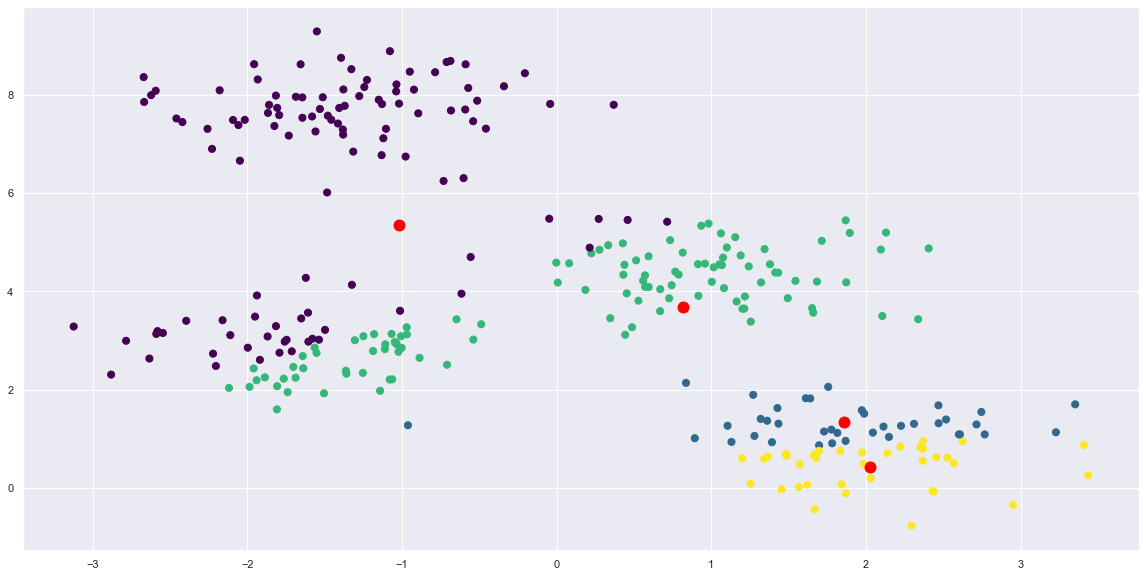

In [6]:
# fit our function to the data set with the starting point rseed=0.
centrePoints, labels = find_clusters(X,4,0)

# plot the figure
plt.figure(figsize = (20,10))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centrePoints[0][0],centrePoints[0][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[1][0],centrePoints[1][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[2][0],centrePoints[2][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[3][0],centrePoints[3][1],s=120,c='red', marker="o")

plt.show()

#### Discussion

There is a difference in the way the dataset was clustered in last two examples above. This was due to the differnce in randomisations of their inital centers. Because of this, they weren't able to find the best clusters and the centres were also affeted. This is a normla occurance with KMeans fuctions.




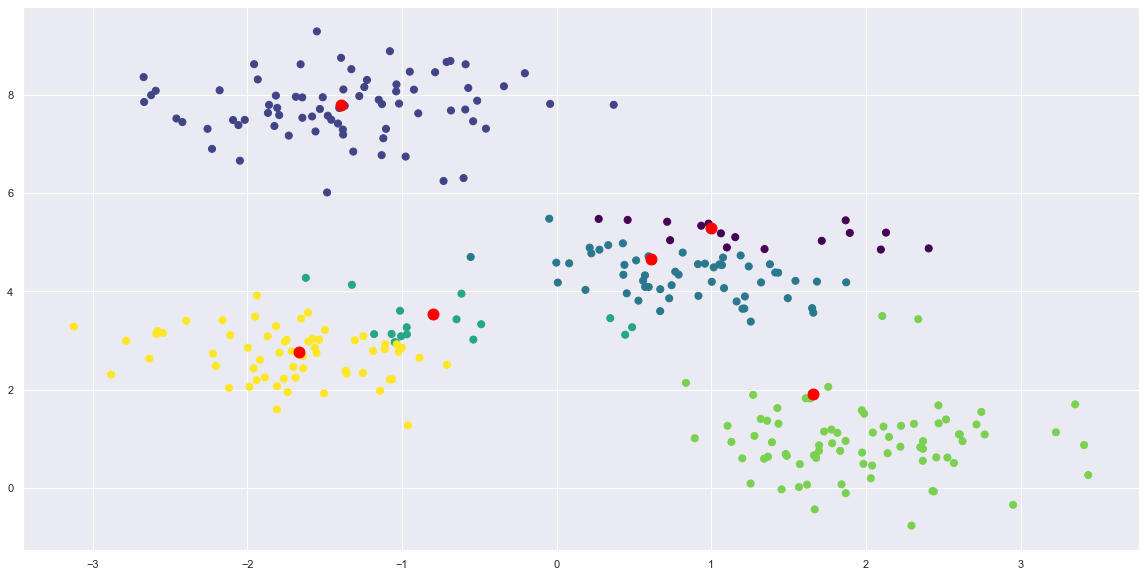

In [7]:
# fit our function to the data set with the starting point rseed=2 k=6.
centrePoints, labels = find_clusters(X,6,2)

# plot the figure
plt.figure(figsize = (20,10))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centrePoints[0][0],centrePoints[0][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[1][0],centrePoints[1][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[2][0],centrePoints[2][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[3][0],centrePoints[3][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[4][0],centrePoints[4][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[5][0],centrePoints[5][1],s=120,c='red', marker="o")

plt.show()

## Defining Init Function for KMeans++

The purpose of the KMeans++ funtion is to get a better approximation for the centers of clusters in the dataset. This is done by calculating the distance of each point in X to its closest center and the calculaing the its probabaility. This probability is then used to randomly determine a new center. This is repeatd until you get a list of approximate centers based on probability that can then act as the first inital centers in the original KMeans function. The euclidean distance is calcualted usign the function np.linalg.norm as he defualt setting is th eeucldian distance. We the find a random number in the rnage of indexes of X and set this as the point for the inital center. The flatten fucntion is used to turn the 2d array that the X dataset gives to a 1d array, so that we have a rgular 2-dimensial list in the end. The formulas given were used to calculate the dj and pj of X. Finallly this probabily, pj, was used to determine an approximate index for the next center. 

In [99]:
# def eucl_dist(a, b, axis=1):
def eucl_dist(a, b, axis=1):
#     def the function that calculate the l2 distance
    return np.linalg.norm(a - b, axis=axis) #the euclidean distance is the same as the L2 norm, this is the defaut for the np.linalg.norm functon

# def the init function for kmean++:
# 
# def init_center(k,X,rseed):
def init_center(k, X, rseed):
#     create a empty list store centers 
    centres=[]
#     random choose a center:
#         random choose a index:
#         using np.random.RandomState first to set the seed and store it to a variable r
    r = np.random.RandomState(rseed)
    
#         using r.permutation(data shape) to choose first data point index as initial center.
    index_1 = r.permutation(X.shape[0])[:1]
          
#     append this center to the center list
    centres.append(X[index_1].flatten())#the flatten fucntion is used to turn the 2d array to a 1d array so that we get final 2d centre point list and not 3d

    
#     while the length of the list less than k:
    while(len(centres) < k):
        
#         calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
        dj=[]
        for i in range(X.shape[0]):
            dis = eucl_dist(X[i], centres)
            dj.append(np.min(dis))
    
#         calculate pj: pj=dj^2/sum_all(d^2) for all data point
        for i in range(len(dj)):
            dj[i] = dj[i]**2
        pj = dj/np.sum(dj)
        
#         random choose j using the probability:
#             using np.random.choice()
        j = np.random.choice(X.shape[0],size=1,p=pj)
    
#         set the new center to be x^j
#         append the new center to center list
        centres.append(X[j].flatten())
    
#     return all centers
    return centres

In [100]:
# def the kmean++:
# def kmpp(X, n_clusters):
def kmpp(X, n_clusters, rseed):
    
#     first init centers
    init_centres = init_center(n_clusters, X, rseed)

#     then, run the k-means with the initialized centers.
    centrePoints, labels = find_clusters(X, n_clusters, rseed, init_centres)
    return centrePoints, labels

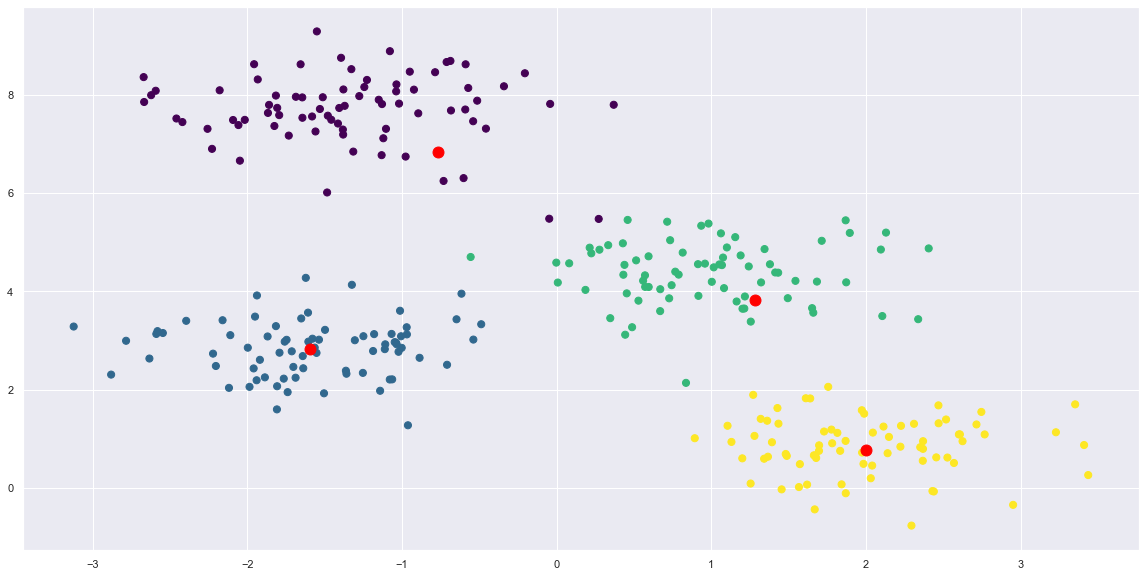

In [101]:
# fit our kmean++ function to the data set with rseed=2.
centrePoints, labels = kmpp(X,4,2)

# plot the figure
plt.figure(figsize = (20,10))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centrePoints[0][0],centrePoints[0][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[1][0],centrePoints[1][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[2][0],centrePoints[2][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[3][0],centrePoints[3][1],s=120,c='red', marker="o")

plt.show()

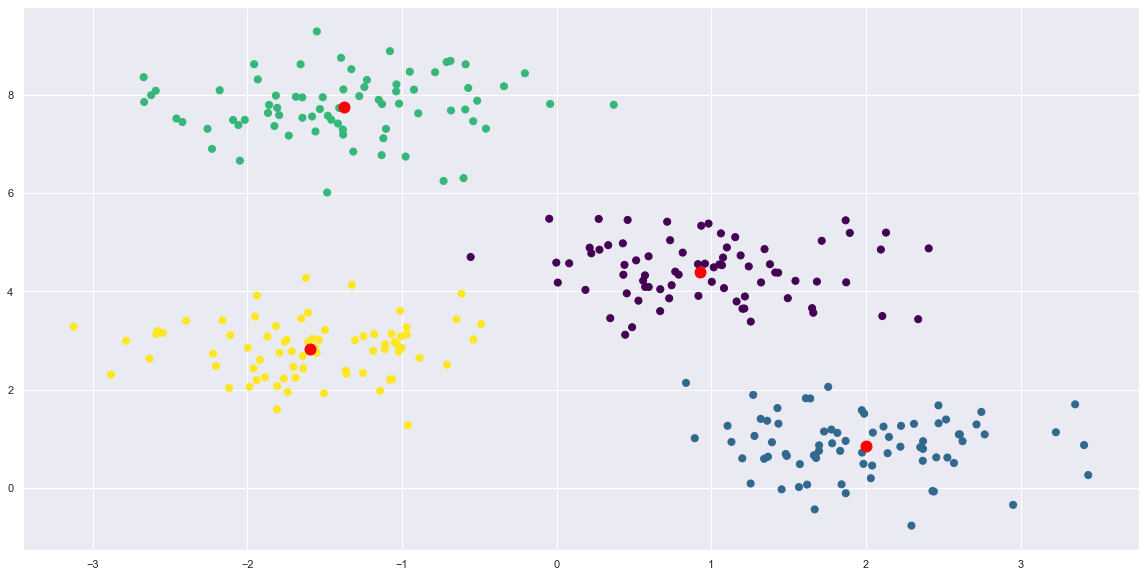

In [102]:
# fit our kmean++ function to the data set with rseed=0.
centrePoints, labels = kmpp(X,4,0)

# plot the figure
plt.figure(figsize = (20,10))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centrePoints[0][0],centrePoints[0][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[1][0],centrePoints[1][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[2][0],centrePoints[2][1],s=120,c='red', marker="o")
plt.scatter(centrePoints[3][0],centrePoints[3][1],s=120,c='red', marker="o")

plt.show()

#### Discussion

In the two examples of KMeans++ clustering, we can observe ony slight differneces . They seem to be way more accurate than the original KMeans function. In both the cases where rSeed = 0 and rSeed = 2, KMeans++ has found an optimal clustering for the data points. It also shows that the clustering of Kmeans++, is not dependent on the inital center location, as we can see a small deviaton in the rseed=2 case. This makes for more stable results as the centres created will be further apart adn thus more optimal 